In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
generator = np.random.default_rng(999)
schedules = generator.integers(low=0, high=5, size=(1000, 21))

print(schedules)

[[4 3 0 ... 2 0 0]
 [2 4 3 ... 3 3 2]
 [1 0 1 ... 1 2 1]
 ...
 [2 2 1 ... 3 1 4]
 [1 0 3 ... 2 3 2]
 [1 1 4 ... 2 4 2]]


In [ ]:
S1 = schedules[:, 1:]
S2 = schedules[:, :-1]
diff = S1 - S2
diff[0]

array([-1, -3,  0,  0,  3, -3,  3, -3,  0,  0,  4, -4,  0,  4, -1, -1,  2,
       -2, -2,  0])

In [ ]:
idxs = np.argwhere(np.all(diff != 0, axis=-1) == True)
idxs

array([[ 25],
       [138],
       [188],
       [289],
       [375],
       [426],
       [533],
       [886],
       [975],
       [982]])

In [ ]:
locs = np.array([
    [0,0,0],
    [1,1,2],
    [0,0,0],
    [2,1,3],
    [5,5,4],
    [5,0,0],
    [5,0,0],
    [0,0,0],
    [2,1,3],
    [1,3,1]
])

generator = np.random.default_rng(1010)
weights = generator.normal(size=10)

print(weights)

[-1.69870017  0.53799701 -0.22561399 -1.09020894  0.55391264 -1.50115445
  0.44545933  1.3448172  -1.12364327  0.21216015]


In [ ]:
unique_positions, commons = np.unique(locs, return_inverse=True, axis=0)
print(commons)

[0 1 0 3 5 4 4 0 3 2]


In [ ]:
one_hot = np.eye(max(commons)+1)[commons]
one_hot_weights = weights[:, None] * one_hot
remaining_fish_weights = np.max(np.abs(one_hot_weights), axis=0)
print(one_hot)
print(one_hot_weights)
print(remaining_fish_weights)
np.sum(np.abs(weights)[:, None] == remaining_fish_weights, axis=-1)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[-1.69870017 -0.         -0.         -0.         -0.         -0.        ]
 [ 0.          0.53799701  0.          0.          0.          0.        ]
 [-0.22561399 -0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -1.09020894 -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.55391264]
 [-0.         -0.         -0.         -0.         -1.50115445 -0.        ]
 [ 0.          0.          0.          0.          0.44545933  0.        ]
 [ 1.3448172   0.          0.          0.          0.          0.        ]
 [-0.         -0.         -0.         -1.12364327 -0.         -0.        ]
 [ 0.          0.          0.21216015  0.          0.          0.        ]]
[1.69870017 0.53799701 0.21216015 1.12

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
generator = np.random.default_rng(123)
ratings = np.round(generator.uniform(0, 10, size=(10,2)), 2)
ratings[[1,2,7,9], 0] = np.nan
print(ratings)

[[6.82 0.54]
 [ nan 1.84]
 [ nan 8.12]
 [9.23 2.77]
 [8.2  8.9 ]
 [5.13 2.45]
 [8.24 2.14]
 [ nan 6.3 ]
 [9.27 2.32]
 [ nan 5.18]]


In [ ]:
out = np.where(np.isnan(ratings[:,0]), ratings[:,1], ratings[:,0])
print(out)

[6.82 1.84 8.12 9.23 8.2  5.13 8.24 6.3  9.27 5.18]


In [ ]:
np.arange(3).isnan()

AttributeError: 'numpy.ndarray' object has no attribute 'isnan'

In [ ]:
temp = np.random.randn(4,2)
temp

array([[ 0.57849295, -0.50669431],
       [ 0.22510326,  0.16167233],
       [-0.06241073,  1.18872153],
       [-0.2911122 ,  0.93793207]])

In [ ]:
np.any(temp>1, axis=-1)

array([False, False,  True, False])

In [ ]:
np.all(temp < 1, axis=-1)

array([ True,  True, False,  True])

In [ ]:
closest = np.random.choice([0,1,2],  size=10)
dists = np.random.rand(10)[:, None] #Just kick this up to (n, 2) dim points!
one_hot = np.eye(3)[closest]
new_centers = (dists * one_hot).sum(axis=0)
print(closest)
print(dists)
print(one_hot)
print(new_centers)

[0 1 2 0 2 0 2 1 0 0]
[[0.49003106]
 [0.94693865]
 [0.50668639]
 [0.93969319]
 [0.61743745]
 [0.1642427 ]
 [0.7086138 ]
 [0.99215532]
 [0.72054317]
 [0.7879176 ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[3.10242773 1.93909397 1.83273764]


In [ ]:
k=3
one_hot = np.eye(k)[temp]
print(one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
x = np.random.uniform(size=(10, 3))
c = np.argmin(x, axis=-1)
print(x)
print(c)

[[0.71954496 0.47363837 0.40973814]
 [0.97109306 0.17922544 0.62701659]
 [0.27601068 0.7012623  0.54379222]
 [0.22576448 0.3615013  0.1194413 ]
 [0.00232815 0.21757236 0.9335884 ]
 [0.01538137 0.79942981 0.68500669]
 [0.9985032  0.57613418 0.22830768]
 [0.41139631 0.47798357 0.4317264 ]
 [0.52998597 0.1184142  0.31229205]
 [0.00181579 0.21517463 0.18926067]]
[2 1 0 2 0 0 2 0 1 0]


In [ ]:
x[np.arange(10), c]

array([0.40973814, 0.17922544, 0.27601068, 0.1194413 , 0.00232815,
       0.01538137, 0.22830768, 0.41139631, 0.1184142 , 0.00181579])

In [ ]:
field = np.zeros((10,10))
field

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
idxs = np.random.choice(np.arange(100), size=20, replace=False)
vals = np.random.normal(size=20)
field.ravel()[idxs] = vals
field

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.03030373,  0.        ],
       [-0.74455502,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.64439215,  0.        ],
       [ 0.        ,  0.0049198 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.52759797,  0.        ,  0.        ,
         1.57016739,  0.        ,  0.        ,  0.        , -0.78082448],
       [-0.39451908,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.09978997,  0.        , -0.01094582,  0.        ,  0.        ],
       [ 0.        , -0.32008518,  0.        ,  0.        ,  0.        ,
         0.        ,  0.16240999,  0.        

In [ ]:
generator = np.random.default_rng(80085)
scores = np.round(generator.uniform(high=100.0, low=30.0, size=15), 2)
print(scores)

[68.37 36.32 76.06 56.56 56.07 53.64 63.28 63.61 36.15 87.58 80.18 81.77
 84.47 75.63 42.34]


In [ ]:
mask = scores < 60.0
scores[np.nonzero(mask)[0][:3]] = 0
print(scores)

[68.37  0.   76.06  0.    0.   53.64 63.28 63.61 36.15 87.58 80.18 81.77
 84.47 75.63 42.34]


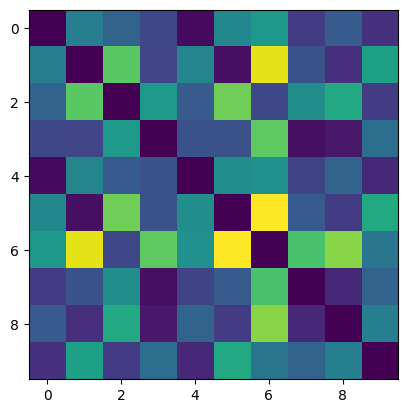

In [ ]:
scores = np.random.randn(10)
diff = np.abs(scores[:, None] - scores)
plt.imshow(diff)

In [ ]:
foo = np.random.randn(3,3)
print(foo)
# mask = foo < 0
# foo[mask] = 0.0
# print(foo)
# index_x = np.array([True, False, True])
# index_y = np.array([False, False, True])
# foo[index_x, index_y]
print(foo[(foo > 0) & (foo < 1)])

[[ 1.10129255  0.0477631  -0.20372752]
 [-0.93117334 -0.98269608  1.08301355]
 [-2.01173158 -1.13972228  0.41953056]]
[0.0477631  0.41953056]


In [ ]:
points = np.random.rand(200,2) # 10 points in 2D space
centers = np.random.rand(4,2) # 2 points in 2D space

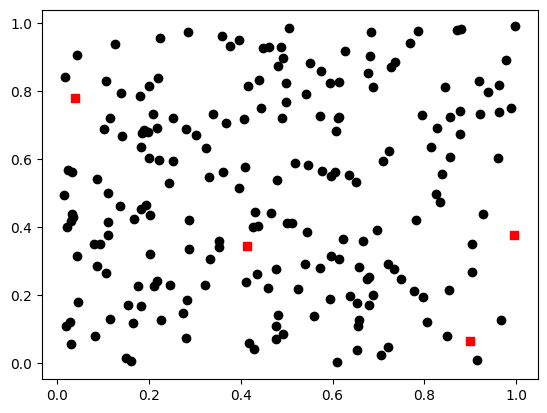

In [ ]:
plt.scatter(points[:,0], points[:,1], c="k")
plt.scatter(centers[:,0], centers[:,1], c="r", marker="s")

In [ ]:
def train_step(points: np.array, centers: np.array):
  assert points.shape[-1] == centers.shape[-1]
  K = centers.shape[0]
  squared_differences = np.square(points - centers[:, None, :]).sum(axis=-1)
  closest_center = np.argmin(squared_differences, axis=0)
  new_centers = np.array([points[closest_center == k].mean(axis=0) for k in range(K)])
  return new_centers, np.sum(squared_differences)

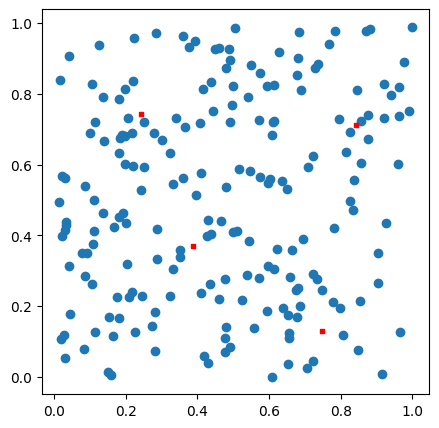

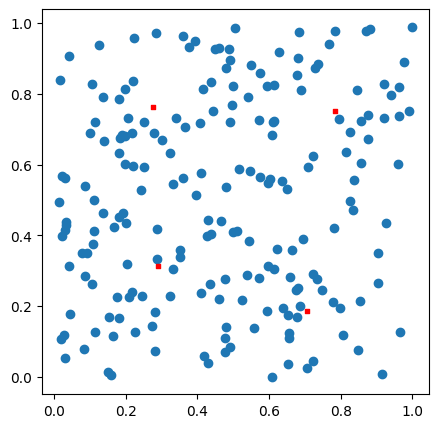

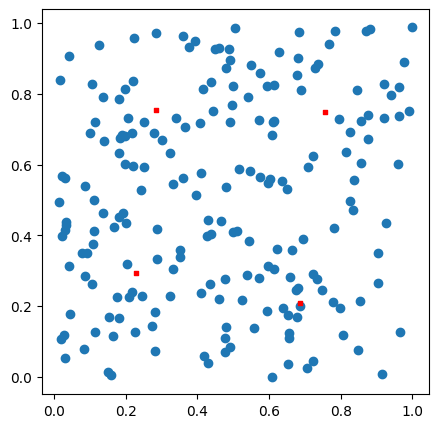

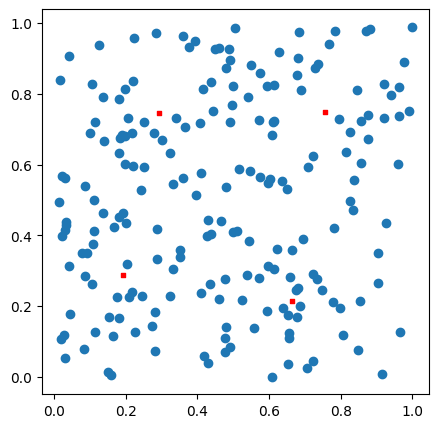

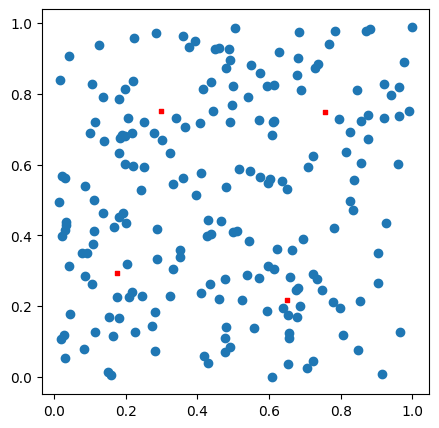

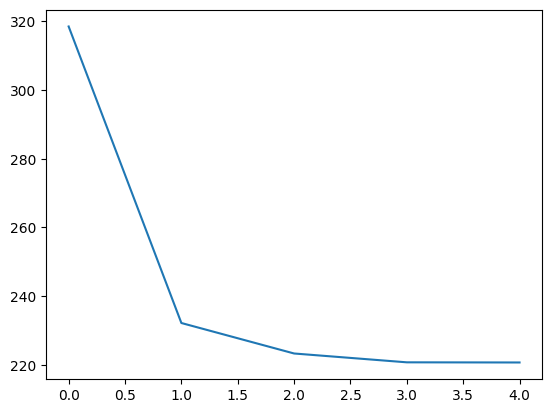

In [ ]:
num_steps = 5
losses = []
for i in range(num_steps):
  centers, loss = train_step(points, centers)
  losses.append(loss)
  plt.figure(figsize=(5,5))
  plt.scatter(points[:,0], points[:,1])
  plt.scatter(centers[:,0], centers[:,1], c="r", marker="s", s=8)
  plt.show()
plt.plot(losses)

In [ ]:
squared_differences = np.square(points - centers[:, None, :]).sum(axis=-1)
closest_center = np.argmin(squared_differences, axis=0)
# new_centers = [np.sum(points[mask], axis=0) for ]
# new_centers = []
# for i in range(3):
#   mask = closest_center == i
#   new_center = np.mean(points[mask], axis=0)
#   new_centers.append(new_center)
# new_centers = np.array(new_centers)
new_centers = np.array([points[closest_center == k].mean(axis=0) for k in range(3)])
print(new_centers.shape)
print(new_centers)

(3, 2)
[[0.37538153 0.79141974]
 [0.21692214 0.22706844]
 [0.94577313 0.70313911]]


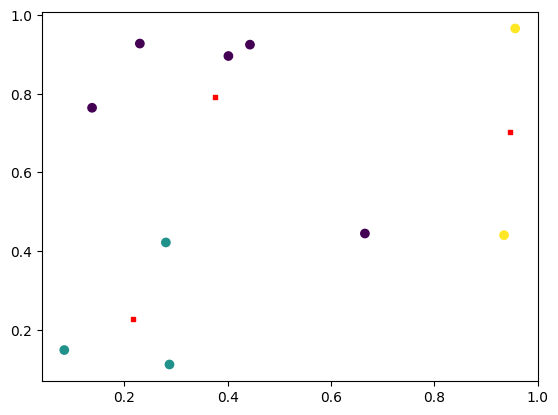

In [ ]:
plt.scatter(points[:,0], points[:,1], c=closest_center)
plt.scatter(new_centers[:,0], new_centers[:,1], c="r", marker="s", s=8)

In [ ]:
print(squared_differences)

[[0.07910235 0.04239737 0.05683884 0.49064118 0.31480662 0.06400878
  0.17021518 0.07394845 0.43034639 0.33031453]
 [0.37005313 0.15768601 0.31960087 0.93923412 0.07648082 0.01043226
  0.23006941 0.31135893 0.55742121 0.06134239]
 [0.18270396 0.55876842 0.22015802 0.01048123 0.97930527 0.58743944
  0.2594453  0.41042988 0.22567925 1.20096409]]


In [ ]:
closest_center

array([0, 0, 0, 2, 1, 1, 0, 0, 2, 1])

In [ ]:
assignment = closest_center == np.arange(3)[:,None]
assignment.shape

(3, 10)

In [ ]:

temp = points[assignment[0,:]]
temp.shape

(5, 2)

In [ ]:
dummy = np.stack([points]*3)
temp = dummy[assignment, :]


array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [ ]:
generator = np.random.default_rng(80085)
scores = np.round(generator.uniform(30.0, 100.0, 15))
print(scores)

[68. 36. 76. 57. 56. 54. 63. 64. 36. 88. 80. 82. 84. 76. 42.]


In [ ]:
mask = scores < 60
idxs = np.arange(len(scores))[mask]
scores[idxs[:3]] = 0.
print(scores)

[68.  0. 76.  0.  0. 54. 63. 64. 36. 88. 80. 82. 84. 76. 42.]


In [ ]:
field = np.zeros((10,10))
field

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.random.choice(field.size, size=20, replace=False)

array([78, 98, 62, 92, 20, 84, 55, 94, 32, 59, 31, 89, 14, 47,  2, 80, 43,
       25, 45, 33])

In [ ]:
mask = np.random.choice(np.arange(100), size=20, replace=False)
temp = field.ravel()
temp[mask] = np.random.normal(size=20)
field

array([[ 0.        ,  1.18959978,  0.        ,  0.        ,  0.        ,
         0.        ,  0.07526595,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.3582092 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.391034  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.86684906,  0.        ,  0.55564024,
         0.        , -0.22674943,  0.        ,  0.        ,  0.        ],
       [ 0.5761746 ,  0.        ,  0.        , -2.17668139,  0.        ,
         0.        ,  2.1728423 , -0.29810527,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.56281357,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.47103683,  0.90186344

In [ ]:
generator = np.random.default_rng(1010)
love_scores = np.round(generator.uniform(0.0, 100.0, 10), 2)

In [ ]:
print(love_scores)

[ 9.5  53.58 91.77 98.15 84.88 74.61 40.94 56.49  8.39 64.69]


In [ ]:
diff = np.abs(love_scores - love_scores[:, None])

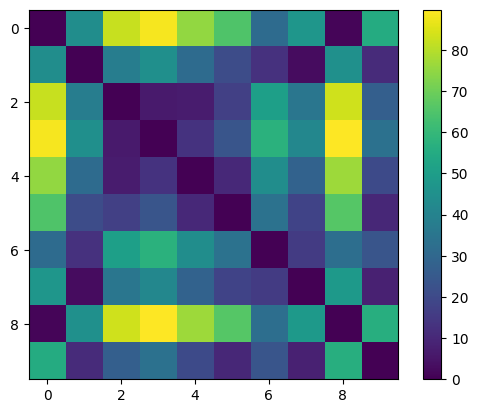

In [ ]:
plt.imshow(diff)
plt.colorbar()

In [ ]:
temp = np.array([[1, 2, 3], [4, np.inf, 6.0]])
np.isinf(temp)

array([[False, False, False],
       [False,  True, False]])

In [ ]:
np.random.seed(42)
np.random.randint(low=1, high=7, size=(3))

array([4, 5, 3])

In [ ]:
np.random.choice([1, 2, 3, 4, 5, 6], size=5, replace=False)

array([6, 3, 1, 4, 5])

In [ ]:
np.random.random_sample?

In [ ]:
temp = np.arange(9)
temp

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
r = np.reshape(temp, (3,3), order='C')
c = np.reshape(temp, (3,3), order='F')

In [ ]:
temp = np.arange(9).reshape(3,3)
temp

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
r = np.reshape(temp, (-1,), order='C')
c = np.reshape(temp, (-1,), order='F')

In [ ]:
temp = np.arange(8).reshape(4,2)
temp

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [ ]:
r = np.reshape(temp, (2,4), order='C')
c = np.reshape(temp, (2,4), order='F')

In [ ]:
c

array([[0, 4, 1, 5],
       [2, 6, 3, 7]])

In [ ]:
A = np.array([3, 11, 4, 5])
B = np.array([5, 0, 3])
# [4, 3] [4,3]
C = A[:, None] - B
C.shape

(4, 3)

In [ ]:
temp = np.random.randn(4,2)
t2 = temp.reshape(-1,1)

In [ ]:
(t)

In [ ]:
points = np.random.randn(10,2)

In [ ]:
centers = np.array([
    [-1,-1],
    [1,1],
    [-1,1]
])
centers.shape

(3, 2)

In [ ]:
diffs = (points[:, None, :] - centers[None, :, :])
dists = np.sqrt(np.square(diffs).sum(axis=-1))
category = np.argmin(dists, axis=-1)


array([2, 1, 2, 1, 0, 1, 0, 1, 1, 2])

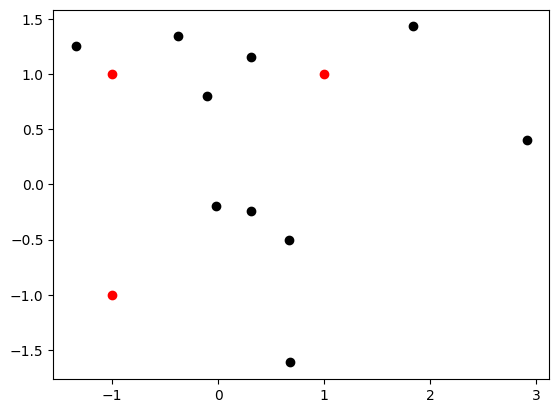

In [ ]:
plt.scatter(points[:,0], points[:,1], c='k')
plt.scatter(centers[:,0], centers[:,1], c='r')

In [ ]:
s1 = np.linspace(17,28,3)
s2 = np.linspace(32,36,3)
ads = np.concatenate((s1,s2))
dists = np.abs(ads - 30.0)
order = np.array(["A", "B", "C", "C", "B", "A"])
mask = order == "C"
dists[mask]

array([2., 2.])

In [ ]:
np.concatenate?

In [ ]:
np.random.seed(5555)
gold = np.random.randint(low=0, high=10, size=(7,7))

In [ ]:
gold

array([[2, 3, 0, 5, 2, 0, 3],
       [8, 8, 0, 7, 1, 5, 3],
       [0, 1, 6, 2, 1, 4, 5],
       [4, 0, 8, 9, 9, 8, 7],
       [4, 2, 7, 0, 7, 2, 1],
       [9, 8, 9, 2, 5, 0, 8],
       [1, 9, 8, 2, 6, 4, 3]])

In [ ]:
locs = np.array([
    [0,4],
    [2,2],
    [2,3],
    [5,1],
    [6,3]
])

In [ ]:
np.sum(gold[locs[:,0], locs[:,1]])

20

In [ ]:
dailywts = 185 - np.arange(5*7)/5

In [ ]:
sats = dailywts[5::7]
suns = dailywts[6::7]
weekend_av = (sats + suns)/2
weekend_av

array([183.9, 182.5, 181.1, 179.7, 178.3])

In [ ]:
dailywts

array([185. , 184.8, 184.6, 184.4, 184.2, 184. , 183.8, 183.6, 183.4,
       183.2, 183. , 182.8, 182.6, 182.4, 182.2, 182. , 181.8, 181.6,
       181.4, 181.2, 181. , 180.8, 180.6, 180.4, 180.2, 180. , 179.8,
       179.6, 179.4, 179.2, 179. , 178.8, 178.6, 178.4, 178.2])

In [ ]:
temp = dailywts.reshape(-1,7)
weekend_weight = temp[:, -2:]
av = weekend_weight.mean(axis=-1)
av

array([183.9, 182.5, 181.1, 179.7, 178.3])

In [ ]:
chewy = np.zeros((10,10,10))
chewy.shape

(10, 10, 10)

In [ ]:
i = np.arange(1, 10, 2).reshape(5,1,1)
j = np.arange(0, 10, 2).reshape(1,5,1)
k = np.array([2,3,5,7]).reshape(1,1,4)
chewy[i,j,k] = 1
chewy

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [ ]:
generator = np.random.default_rng(2357)
jim = np.round(generator.normal(loc=100, scale=5, size=(5,2,4)))

blocks = np.array([
    [[0,2],[1,3]],
    [[1,2],[0,0]],
    [[0,0],[1,2]],
    [[1,1],[0,3]],
    [[0,1],[1,0]]
])

pops = np.array([
    [100, 105],
    [110, 92],
    [95, 99],
    [89, 107],
    [101, 98]
])

jim.shape, blocks.shape, pops.shape

((5, 2, 4), (5, 2, 2), (5, 2))

In [ ]:
pop = jim[0,:,:]
block = blocks[0,:,:]
print(pop.shape)
print(block.shape)

(2, 4)
(2, 2)


In [ ]:
year_idx = np.arange(5)[:,np.newaxis]
year_idx.shape

(5, 1)

In [ ]:
jim_filtered = jim[year_idx, blocks[:,:,0], blocks[:,:,1]]
np.abs(pops - jim_filtered)/pops

array([[0.08      , 0.04761905],
       [0.07272727, 0.13043478],
       [0.07368421, 0.07070707],
       [0.13483146, 0.04672897],
       [0.        , 0.04081633]])

In [ ]:
locs = np.array([
    [0,0,0],
    [1,1,2],
    [0,0,0],
    [2,1,3],
    [5,5,4],
    [5,0,0],
    [5,0,0],
    [0,0,0],
    [2,1,3],
    [1,3,1]
])

generator = np.random.default_rng(1010)
weights = generator.normal(size=10)

print(weights)

[-1.69870017  0.53799701 -0.22561399 -1.09020894  0.55391264 -1.50115445
  0.44545933  1.3448172  -1.12364327  0.21216015]


In [ ]:
order = np.argsort(weights)
locs[order]

array([[0, 0, 0],
       [5, 0, 0],
       [2, 1, 3],
       [2, 1, 3],
       [0, 0, 0],
       [1, 3, 1],
       [5, 0, 0],
       [1, 1, 2],
       [5, 5, 4],
       [0, 0, 0]])

In [ ]:
l, map = np.unique(locs, return_inverse=True, axis=0)

In [ ]:
np.argsort(weights)

array([0, 5, 8, 3, 2, 9, 6, 1, 4, 7])

In [ ]:
foo = np.arange(3*2*4).reshape(3,2,4)
foo[:,:,0]

array([[ 0,  4],
       [ 8, 12],
       [16, 20]])

In [ ]:
three = np.array([[0], [1], [2]])
three.shape

(3, 1)

In [ ]:
generator = np.random.default_rng(123)
ratings = np.round(generator.uniform(low=0.0, high=10.0, size=(10, 2)))
ratings[[1,2,7,9], [0,0,0,0]] = np.nan

print(ratings)

[[ 7.  1.]
 [nan  2.]
 [nan  8.]
 [ 9.  3.]
 [ 8.  9.]
 [ 5.  2.]
 [ 8.  2.]
 [nan  6.]
 [ 9.  2.]
 [nan  5.]]


In [ ]:
cond = ~np.any(np.isnan(ratings), axis=1)
np.where(~np.any(np.isnan(ratings), axis=1), ratings[:,0], ratings[:,1])

array([7., 2., 8., 9., 8., 5., 8., 6., 9., 5.])

In [ ]:
temp1 = np.random.randn(4,3)
temp2 = np.random.randn(4,3)
t = np.stack((temp1, temp2), axis=1)
t.shape

(4, 2, 3)

In [ ]:
np.any(np.isnan(temp), axis=1)

array([False,  True, False, False])

In [ ]:
np.sum(temp, axis=0)

array([-0.9780226 , -0.12819929,         nan])

In [ ]:
generator = np.random.default_rng(1010)
love_scores = np.round(generator.uniform(low=0, high=100, size=10), 2)

print(love_scores)

[ 9.5  53.58 91.77 98.15 84.88 74.61 40.94 56.49  8.39 64.69]


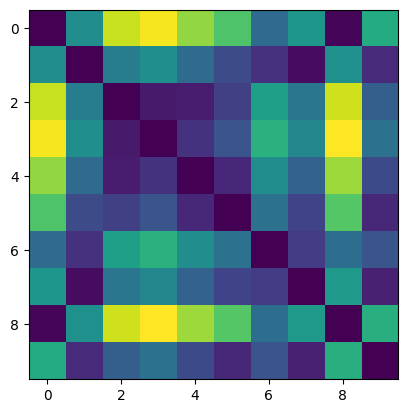

In [ ]:
dist = np.abs(love_scores - love_scores[..., np.newaxis])
plt.imshow(dist)

In [ ]:
generator = np.random.default_rng(80085)
scores = np.round(generator.uniform(low=30, high=100, size=15))

print(scores)

[68. 36. 76. 57. 56. 54. 63. 64. 36. 88. 80. 82. 84. 76. 42.]


In [ ]:
mask = np.where(scores < 60)[0]
scores[mask[:3]] = 0.0
print(scores)

[68.  0. 76.  0.  0. 54. 63. 64. 36. 88. 80. 82. 84. 76. 42.]


In [ ]:
field = np.zeros(shape = (10, 10))
values = np.random.randn(20)
idxs = np.random.choice(np.arange(99), size=20, replace=False)
field.ravel()[idxs] = values
field

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.50174454,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.10439197,  0.        ],
       [ 0.        ,  1.15941507,  0.        ,  0.        ,  0.        ,
         0.58958416,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.37861017,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.72593461, -0.56900941,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.20179709,  0.        ,  0.        ,  0.        ,  0.98064252,
         0.        ,  0.        ,  1.556602  

In [ ]:
A = np.array([3, 11, 4, 5])
B = np.array([5, 0, 3])
A = A[:, np.newaxis]
A - B

array([[-2,  3,  0],
       [ 6, 11,  8],
       [-1,  4,  1],
       [ 0,  5,  2]])

In [ ]:
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.reshape(a, newshape=(3,3), order="F")

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [ ]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
dailywts = 185 - np.arange(5*7)/5

print(dailywts)

[185.  184.8 184.6 184.4 184.2 184.  183.8 183.6 183.4 183.2 183.  182.8
 182.6 182.4 182.2 182.  181.8 181.6 181.4 181.2 181.  180.8 180.6 180.4
 180.2 180.  179.8 179.6 179.4 179.2 179.  178.8 178.6 178.4 178.2]


In [ ]:
saturday_weights = dailywts[5::7]
sunday_weights = dailywts[6::7]

weekend_weight_avg = (saturday_weights+sunday_weights)/2.0
print(weekend_weight_avg)

[183.9 182.5 181.1 179.7 178.3]


In [ ]:
temp = np.arange(1,2*4*7, 2).reshape(4,7) + np.array([0,2,4,6]).reshape(4,1)
temp

array([[ 1,  3,  5,  7,  9, 11, 13],
       [17, 19, 21, 23, 25, 27, 29],
       [33, 35, 37, 39, 41, 43, 45],
       [49, 51, 53, 55, 57, 59, 61]])

In [ ]:
np.random.seed(5555)
gold = np.random.randint(low=0, high=10, size=(7,7))
locs = np.array([
    [0,4],
    [2,2],
    [2,3],
    [5,1],
    [6,3]
])
gold[locs[:,0], locs[:,1]].sum().item()

20

In [ ]:
prize_doors = np.array([
    [1, 0, 2],
    [0, 0, 1],
    [3, 3, 1],
    [1, 2, 0],
    [2, 1, 1]
])

prizes = np.array([
    [100, 150, 500],
    [200, 300, 250],
    [150, 100, 325],
    [425, 200, 100],
    [200, 250, 300]
])

In [ ]:
prize_doors.shape, prizes.shape

((5, 3), (5, 3))

In [ ]:
P = np.zeros((5,3,4))

(5, 3, 4)

In [ ]:
temp = prize_doors[..., np.newaxis]


1

In [ ]:
mask = np.array([1,3,2])
idx = np.zeros((3,3))
I = np.eye(3)
idx[np.arange(3)] = I[mask-1]
idx

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
P = np.zeros((5*3, 4))
I = np.eye(4)
mask = prize_doors
P[np.arange(5*3), :] = I[mask.ravel()]*prizes.ravel()[:,np.newaxis]
P = P.reshape((5,3,4))
P

array([[[  0., 100.,   0.,   0.],
        [150.,   0.,   0.,   0.],
        [  0.,   0., 500.,   0.]],

       [[200.,   0.,   0.,   0.],
        [300.,   0.,   0.,   0.],
        [  0., 250.,   0.,   0.]],

       [[  0.,   0.,   0., 150.],
        [  0.,   0.,   0., 100.],
        [  0., 325.,   0.,   0.]],

       [[  0., 425.,   0.,   0.],
        [  0.,   0., 200.,   0.],
        [100.,   0.,   0.,   0.]],

       [[  0.,   0., 200.,   0.],
        [  0., 250.,   0.,   0.],
        [  0., 300.,   0.,   0.]]])

In [ ]:
prize_doors.ravel()

array([1, 0, 2, 0, 0, 1, 3, 3, 1, 1, 2, 0, 2, 1, 1])

In [ ]:
n = 10
chewy = np.zeros((n, n, n))
chewy[1::2, ::2, [2, 3, 5, 7]] = 1
chewy

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [ ]:
generator = np.random.default_rng(2357)
jim = np.round(generator.normal(loc=100, scale=5, size=(5,2,4)))

print(jim)

[[[106. 103.  92. 100.]
  [ 94. 102.  94. 100.]]

 [[104.  96. 109.  96.]
  [101. 104. 102.  92.]]

 [[102. 102. 108. 101.]
  [ 91. 101. 106.  99.]]

 [[101.  98.  95. 102.]
  [100. 101.  99.  93.]]

 [[107. 101. 104. 105.]
  [102.  97. 101. 102.]]]


In [ ]:
blocks = np.array([
    [[0,2],[1,3]],
    [[1,2],[0,0]],
    [[0,0],[1,2]],
    [[1,1],[0,3]],
    [[0,1],[1,0]]
])

pops = np.array([
    [100, 105],
    [110, 92],
    [95, 99],
    [89, 107],
    [101, 98]
])

In [ ]:
jim[0, [0,1], [2,3]]

array([ 92., 100.])

In [ ]:
t0 = np.arange(5).reshape(5,1)
t1 = blocks[:,:,0]
t2 = blocks[:,:,1]
t0.shape, t1.shape, t2.shape

((5, 1), (5, 2), (5, 2))

In [ ]:
jim_f = jim[t0, t1, t2]
marker = (np.abs(jim_f-pops)/pops > 0.1).sum()
marker

2

In [ ]:
blocks.shape, pops.shape

((5, 2, 2), (5, 2))

In [ ]:
blocks[0,0]

array([0, 2])

In [ ]:
foo = np.arange(3*2*4).reshape(3,2,4)
foo

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
temp1 = foo[:,:,0]
temp1

array([[ 0,  4],
       [ 8, 12],
       [16, 20]])

In [ ]:
bar = np.arange(5, 61, 5).reshape(3,4)
bar

array([[ 5, 10, 15, 20],
       [25, 30, 35, 40],
       [45, 50, 55, 60]])

In [ ]:
temp = np.arange(1,13).reshape(2,2,3)
temp

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
temp[0,:,1]

array([2, 5])

In [ ]:
X = np.random.randint(0, 50, size=(4,3))
X

array([[18, 48, 37],
       [13,  3, 39],
       [41, 24, 14],
       [42, 38, 39]])

In [ ]:
first_row = X[0]
first_row += 10
X

array([[28, 58, 47],
       [13,  3, 39],
       [41, 24, 14],
       [42, 38, 39]])

In [ ]:
x = X[1:]
x += 10
X

array([[28, 58, 47],
       [23, 13, 49],
       [51, 34, 24],
       [52, 48, 49]])

In [ ]:
x = X[1:3]
x += 10
X

array([[28, 58, 47],
       [33, 23, 59],
       [61, 44, 34],
       [52, 48, 49]])

In [ ]:
X[[[0,1]]].shape

(1, 2, 3)

In [ ]:
a = np.array([0,1])
b = np.array([0,1,2])
a + b

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [ ]:
x[[1,2],[2,1]]

array([5, 7])

In [ ]:
ind = np.array([[2, 1],
                [0, 1]])
ind.shape

(2, 2)

In [ ]:
x[ind]

array([[71, 86],
       [60, 20]])

In [ ]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [ ]:
row_col = np.array([[0, 1, 2], [2,1,2]])
row_col.shape

(2, 3)

In [ ]:
X[row_col].shape

(2, 3, 4)

In [ ]:
foo = np.arange(3*4*2).reshape(3,4,2)
foo.shape

(3, 4, 2)

In [ ]:
generator = np.random.default_rng(2357)
jim = np.round(generator.normal(loc=100, scale=5, size=(5,2,4)))

In [ ]:
temp = np.arange(9).reshape(3,3)
temp

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
temp[[1,2],[0,0]]

array([3, 6])

In [ ]:
blocks = np.array([
    [[0,2],[1,3]],
    [[1,2],[0,0]],
    [[0,0],[1,2]],
    [[1,1],[0,3]],
    [[0,1],[1,0]]
])

pops = np.array([
    [100, 105],
    [110, 92],
    [95, 99],
    [89, 107],
    [101, 98]
])

In [ ]:
jim

array([[[106., 103.,  92., 100.],
        [ 94., 102.,  94., 100.]],

       [[104.,  96., 109.,  96.],
        [101., 104., 102.,  92.]],

       [[102., 102., 108., 101.],
        [ 91., 101., 106.,  99.]],

       [[101.,  98.,  95., 102.],
        [100., 101.,  99.,  93.]],

       [[107., 101., 104., 105.],
        [102.,  97., 101., 102.]]])

In [ ]:
jim[0,:,:][[0,2], [1,3]]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
foo[ [[0,2], [2,0], [1,1]],
     [[0,0], [0,0], [1,1]],
     [[0,1], [0,2], [0,3]]
]

IndexError: index 2 is out of bounds for axis 2 with size 2

In [ ]:
foo[[[0,2]]]

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]])

In [ ]:
generator = np.random.default_rng(999)
schedules = generator.integers(low=0, high=5, size=(1000, 21))
schedules.shape

(1000, 21)

In [ ]:
changes = np.diff(schedules, axis=-1)
valid_ind = np.all(changes, axis=-1)
valid = schedules[valid_ind]
valid.shape

(10, 21)

In [ ]:
valid

array([[1, 4, 1, 4, 2, 4, 3, 4, 0, 1, 2, 3, 0, 3, 1, 2, 1, 2, 0, 4, 0],
       [0, 4, 3, 0, 4, 3, 0, 4, 3, 4, 1, 2, 4, 0, 1, 4, 1, 0, 3, 2, 0],
       [2, 4, 0, 1, 0, 2, 1, 2, 4, 1, 3, 1, 0, 2, 0, 3, 0, 3, 0, 2, 1],
       [0, 3, 1, 4, 2, 1, 4, 2, 4, 1, 0, 4, 1, 0, 4, 2, 4, 3, 0, 3, 1],
       [0, 4, 3, 1, 2, 3, 4, 3, 1, 2, 1, 2, 0, 2, 0, 3, 2, 0, 3, 1, 4],
       [1, 0, 2, 0, 2, 3, 2, 3, 4, 1, 2, 4, 3, 4, 0, 4, 1, 0, 2, 1, 2],
       [2, 1, 4, 1, 3, 0, 4, 1, 2, 3, 4, 3, 0, 3, 4, 3, 1, 3, 1, 2, 3],
       [3, 4, 3, 0, 4, 1, 0, 4, 1, 4, 1, 3, 1, 3, 4, 3, 1, 2, 3, 4, 0],
       [1, 3, 0, 2, 4, 1, 2, 1, 4, 2, 0, 1, 0, 3, 1, 2, 0, 4, 1, 4, 2],
       [4, 2, 3, 2, 4, 1, 3, 2, 0, 2, 4, 0, 4, 2, 3, 0, 4, 1, 2, 1, 2]])

In [ ]:
ratings = np.round(np.random.uniform(0.0, 10.0, size=(10,2)))
ratings[[1,2,7,9], [0,0,0,0]] = np.nan
fin = np.where(np.isnan(ratings[:,0]), ratings[:,1], ratings[:,0])
np.concatenate((ratings, fin[:,np.newaxis]), axis=-1)

array([[ 7.,  1.,  7.],
       [nan,  7.,  7.],
       [nan,  1.,  1.],
       [ 1.,  8.,  1.],
       [ 4.,  7.,  4.],
       [ 7.,  9.,  7.],
       [ 6.,  8.,  6.],
       [nan,  9.,  9.],
       [ 1.,  7.,  1.],
       [nan,  4.,  4.]])

(array([[ 5.,  9.],
        [nan,  3.],
        [nan,  6.],
        [10.,  5.],
        [ 5.,  8.],
        [ 5.,  7.],
        [ 9.,  7.],
        [nan,  1.],
        [ 2.,  0.],
        [nan, 10.]]),
 array([ 5.,  3.,  6., 10.,  5.,  5.,  9.,  1.,  2., 10.]))

In [ ]:
locs = np.array([
    [0,0,0],
    [1,1,2],
    [0,0,0],
    [2,1,3],
    [5,5,4],
    [5,0,0],
    [5,0,0],
    [0,0,0],
    [2,1,3],
    [1,3,1]
])

generator = np.random.default_rng(1010)
weights = generator.normal(size=10)

print(weights)

[-1.69870017  0.53799701 -0.22561399 -1.09020894  0.55391264 -1.50115445
  0.44545933  1.3448172  -1.12364327  0.21216015]


In [ ]:
indices = weights.argsort()[::-1]
sorted_locs = locs[indices]
a,b = np.unique(sorted_locs, return_index=True)
indices[a]

array([7, 4, 1, 6, 9, 2])

In [ ]:
locs.shape

(10, 3)

In [ ]:
locs2 = np.reshape(locs, (10,1,3))
sames = (locs == locs2).all(axis=-1)
sames.shape

(10, 10)

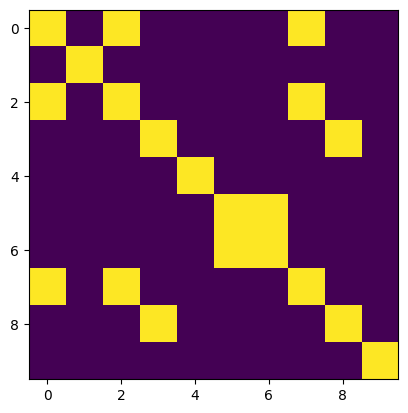

In [ ]:
plt.imshow(sames)

In [ ]:
sorted_weights = weights.sort()
weights

array([-1.69870017, -1.50115445, -1.12364327, -1.09020894, -0.22561399,
        0.21216015,  0.44545933,  0.53799701,  0.55391264,  1.3448172 ])

In [ ]:
#find all locations where 2 vectors are the same

In [ ]:
grid = np.zeros(shape=(10,10), dtype=np.float32)
indices = np.random.choice(np.arange(100), size=20, replace=False)
rands = np.random.randn((20))
grid.ravel()[indices] = rands
grid

array([[ 0.        ,  0.        , -0.35497767,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.659514  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.77787733,  0.        ,  0.        ,
         0.        ,  0.        ,  0.55439717,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.7717541 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.32471105,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.8593526 , -1.4070187 ,  0.        ],
       [ 0.        ,  0.30280423, -1.9962922 ,  0.        ,  0.        ,
         0.6684399 ,  0.        ,  0.        ,  0.        ,  0.02439814],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.3112273 ,
         0.30192602,  0.        ,  0.        

In [ ]:
foo = np.random.randint(0, 100, size=(10,))
bar = np.random.randint(0, 2, size=(10,))
print(foo)
print(bar)
res = np.where(foo%2==0, bar, 2*bar)
print(res)

[77 10 44 63 26 64 46 79 83 42]
[0 1 1 1 0 1 1 1 0 1]
[0 1 1 2 0 1 1 2 0 1]


In [ ]:
np.where(foo%2==0)

(array([1, 2, 4, 5, 6, 9]),)

In [ ]:
b

In [ ]:
scores = np.random.randint(0,  100, size=10)
dist = np.abs(scores[..., np.newaxis] - scores)

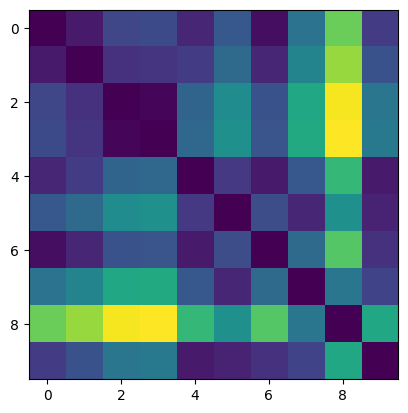

In [ ]:
plt.imshow(dist)

In [ ]:
scores = np.random.uniform(30,100, size = 15).round()
print(scores)
indices = np.where(scores<60)
scores[indices[0][:3]] = 0
print(scores)

[51. 60. 42. 46. 59. 99. 52. 64. 82. 89. 58. 70. 34. 44. 89.]
[ 0. 60.  0.  0. 59. 99. 52. 64. 82. 89. 58. 70. 34. 44. 89.]


In [ ]:
def dist(locations: np.array)->np.array:
  """
  Returns euclidean distances between points i and j as a 2D array
  Args:
    locations: Numpy array of locations of points
  Returns:
    2D Array C, where C[i,j] = distance(locations[i], locations[j])
  """


In [ ]:
A = np.array([3, 11, 4, 5])
B = np.array([5, 0, 3])
A.shape, B.shape

((4,), (3,))

In [ ]:
#C[i,j] = A[i] - B[j]

In [ ]:
C = A[..., np.newaxis] - B
C.shape

(4, 3)

In [ ]:
temp = np.arange(8).reshape((2,4))

In [ ]:
arr = np.arange(9).reshape((3,3))
arr[arr%3==0] = 0
arr

array([[0, 1, 2],
       [0, 4, 5],
       [0, 7, 8]])

In [ ]:
arr = np.arange(20).reshape(5,4)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [ ]:
np.random.shuffle(arr)
arr

array([[16, 17, 18, 19],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [ ]:
np.random.randint(1,  7, size=3)

array([2, 5, 4])

In [ ]:
np.random.choice(np.arange(1,7), size=3, replace=False)

array([2, 3, 6])

In [ ]:
arr.dtype

dtype('int64')

In [ ]:
s = "I am a banana"
l = np.array(s.split(" "))
l.dtype, l.itemsize

(dtype('<U6'), 24)

In [ ]:
np.zeros(shape=(3,5), dtype=np.int32)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
np.random.randint( 0, 7, size=(3,3))

array([[2, 0, 3],
       [0, 3, 3],
       [2, 5, 1]])

In [ ]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [ ]:
y = x[[3, 7, 2]]
y[0] = 1000
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [ ]:
index = np.random.randint(0, 10, size=(3,2))

In [ ]:
x[index]

array([[51, 14],
       [82, 51],
       [51, 14]])

In [ ]:
daily_weight = 185 - np.arange(35)/5
daily_weight

array([185. , 184.8, 184.6, 184.4, 184.2, 184. , 183.8, 183.6, 183.4,
       183.2, 183. , 182.8, 182.6, 182.4, 182.2, 182. , 181.8, 181.6,
       181.4, 181.2, 181. , 180.8, 180.6, 180.4, 180.2, 180. , 179.8,
       179.6, 179.4, 179.2, 179. , 178.8, 178.6, 178.4, 178.2])

In [ ]:
np.reshape(daily_weight, (5, 7))[:,-2:].mean()

181.1

In [ ]:
np.reshape(daily_weight, (5, 7))[:,-2:].mean(axis=-1)

array([183.9, 182.5, 181.1, 179.7, 178.3])

In [ ]:
gold = np.random.randint(0, 10, size=(7,7))
gold

array([[6, 5, 8, 3, 5, 3, 3],
       [7, 0, 5, 7, 7, 2, 0],
       [9, 4, 6, 1, 5, 5, 6],
       [1, 0, 8, 8, 6, 3, 9],
       [0, 6, 5, 0, 8, 0, 6],
       [9, 4, 9, 0, 3, 1, 3],
       [6, 4, 8, 7, 5, 9, 1]])

In [ ]:
idx1 = np.random.randint(0,7, size=(5))
idx2 = np.random.randint(0,7, size=(5))

In [ ]:
gold[idx1, idx2]

array([1, 0, 3, 6, 0])

In [ ]:
bills1 = np.arange(17, 29, 4)
bills2 = np.arange(32, 37, 2)
dist1 = np.abs(bills1 - 30)
dist2 = bills2 - 30
dist1[-1]+dist2[0]

7